# Tests to evaluate the Reinforcement Learning models performances

## Imports

In [1]:
from MCTS import *
from TDLambda_LVFA import *
import matplotlib.pyplot as plt
from CheckersRL import CheckersRL

In [2]:
env = CheckersRL()
player = CheckersRL.WHITE_PAWN

In [3]:
def display_rewards(episodes: int, rewards: float, title: str):
    """
    Displays the rewards throughout the episodes

    @param episodes: The number of episodes
    @param rewards: The episodes rewards
    @param title: The plot title
    """
    plt.plot([i+1 for i in range(episodes)], rewards, color="mediumorchid", label="rewards")
    plt.plot([i+1 for i in range(episodes)],  
            [np.mean(rewards) for _ in range(episodes)], color="red", label="mean_reward")
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title(f"{title} - Mean reward: {np.mean(rewards):.2f}")
    plt.legend()
    plt.show()

## I - Two random agents

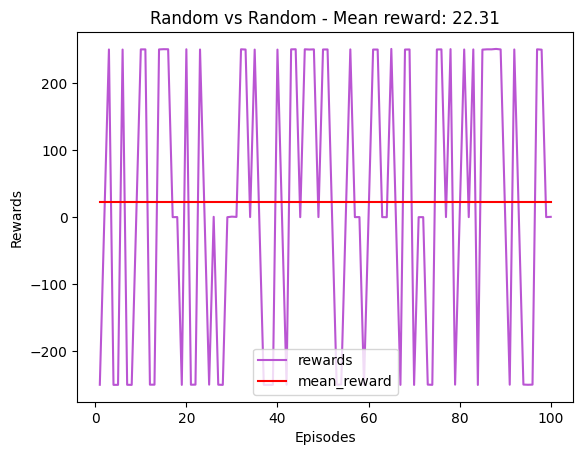

Wins: 0.39
Draws: 0.31
Losses: 0.3


In [4]:
win = 0
draw = 0
loss = 0
rewards = []
episodes = 100
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = random.choice(env.available_moves(state, cur_player))
        state, reward, done, cur_player = env.step(action)
        total_reward += reward

    if reward >= 200:
        win += 1
    elif reward <= -200:
        loss += 1
    else:
        draw += 1
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="Random vs Random")
print(f"Wins: {win/episodes}")
print(f"Draws: {draw/episodes}")
print(f"Losses: {loss/episodes}")

## II - MCTS agent vs random agent 

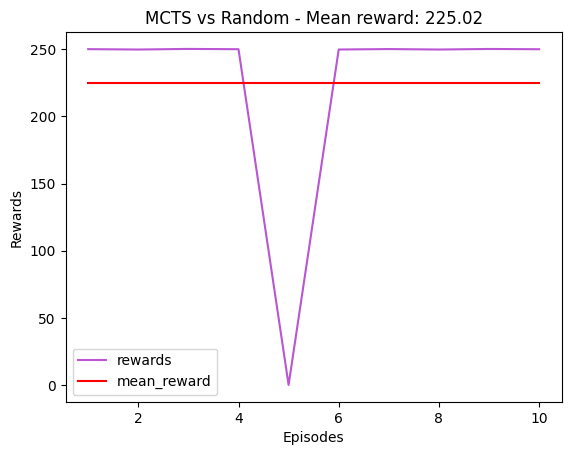

Wins: 0.9
Draws: 0.1
Losses: 0.0


In [5]:
win = 0
draw = 0
loss = 0
rewards = []
episodes = 10
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        if cur_player == player:
            action, root = mcts(deepcopy(state), cur_player, env, iters=100)
        else:
            action = random.choice(env.available_moves(state, cur_player))
        state, reward, done, cur_player = env.step(action)
        total_reward += reward

    if reward >= 200:
        win += 1
    elif reward <= -200:
        loss += 1
    else:
        draw += 1
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="MCTS vs Random")
print(f"Wins: {win/episodes}")
print(f"Draws: {draw/episodes}")
print(f"Losses: {loss/episodes}")


## III - MCTS agent vs MCTS agent

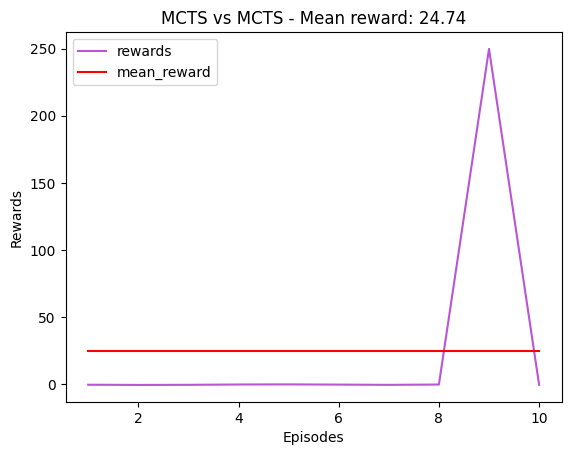

Wins: 0.1
Draws: 0.9
Losses: 0.0


In [7]:
win = 0
draw = 0
loss = 0
rewards = []
episodes = 10
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, root = mcts(deepcopy(state), cur_player, env, iters=100)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward

    if reward >= 200:
        win += 1
    elif reward <= -200:
        loss += 1
    else:
        draw += 1
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="MCTS vs MCTS")
print(f"Wins: {win/episodes}")
print(f"Draws: {draw/episodes}")
print(f"Losses: {loss/episodes}")

## IV - TD(λ) LVFA agent vs random agent

In [8]:
agent = TDLambda_LVFA.load('model.pkl')

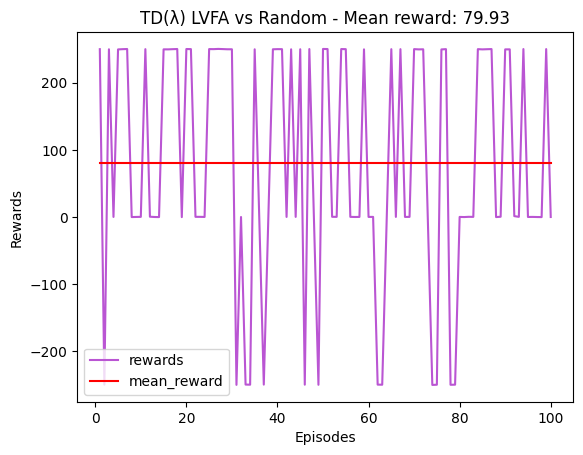

Wins: 0.45
Draws: 0.42
Losses: 0.13


In [9]:
win = 0
draw = 0
loss = 0
rewards = []
episodes = 100
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        if cur_player == player:
            action = agent.policy(state, cur_player)
        else:
            action = random.choice(env.available_moves(state, cur_player))
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
        
    if reward >= 200:
        win += 1
    elif reward <= -200:
        loss += 1
    else:
        draw += 1
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="TD(λ) LVFA vs Random")
print(f"Wins: {win/episodes}")
print(f"Draws: {draw/episodes}")
print(f"Losses: {loss/episodes}")

## V - TD(λ) LVFA agent vs MCTS agent

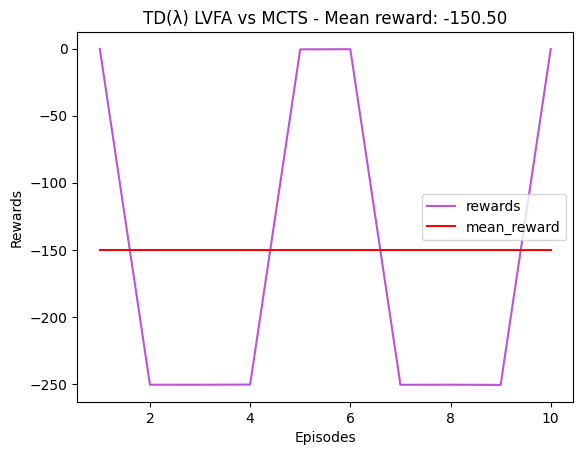

Wins: 0.0
Draws: 0.4
Losses: 0.6


In [10]:
win = 0
draw = 0
loss = 0
rewards = []
episodes = 10
for _ in range(episodes):
    state, cur_player = env.reset()
    done = False
    total_reward = 0
    while not done:
        if cur_player == player:
            action = agent.policy(state, cur_player)
        else:
            action, root = mcts(deepcopy(state), cur_player, env, iters=100)
        state, reward, done, cur_player = env.step(action)
        total_reward += reward
    
    if reward >= 200:
        win += 1
    elif reward <= -200:
        loss += 1
    else:
        draw += 1
    rewards.append(total_reward)

display_rewards(episodes, rewards, title="TD(λ) LVFA vs MCTS")
print(f"Wins: {win/episodes}")
print(f"Draws: {draw/episodes}")
print(f"Losses: {loss/episodes}")
